In [1]:
from IPython.display import Image
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(6,5)}) 
import warnings
warnings.simplefilter("ignore")

In [2]:
from ipywidgets import interact, fixed

In [3]:
df = pd.read_csv('compas-scores-raw.csv',index_col = 'Person_ID')

In [4]:
df.head()

,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
Person_ID,,,,,,,,,,,,,,,,,,,,,
50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [5]:
df.columns

Index(['AssessmentID', 'Case_ID', 'Agency_Text', 'LastName', 'FirstName',
       'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text', 'DateOfBirth',
       'ScaleSet_ID', 'ScaleSet', 'AssessmentReason', 'Language',
       'LegalStatus', 'CustodyStatus', 'MaritalStatus', 'Screening_Date',
       'RecSupervisionLevel', 'RecSupervisionLevelText', 'Scale_ID',
       'DisplayText', 'RawScore', 'DecileScore', 'ScoreText', 'AssessmentType',
       'IsCompleted', 'IsDeleted'],
      dtype='object')

In [6]:
del df['AssessmentID']
del df['Case_ID']
del df['LastName']
del df['FirstName']
del df['MiddleName']

In [213]:
del df['IsCompleted']

In [214]:
del df['IsDeleted']

In [215]:
del df['ScaleSet_ID']

In [84]:
df.Ethnic_Code_Text[df.Ethnic_Code_Text == 'African-Am'] = 'African-American' 

In [209]:
df.head()

,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
Person_ID,,,,,,,,,,,,,,,,,,,,,
50844,PRETRIAL,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
50844,PRETRIAL,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
50844,PRETRIAL,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
50848,PRETRIAL,Male,Caucasian,09/16/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
50848,PRETRIAL,Male,Caucasian,09/16/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


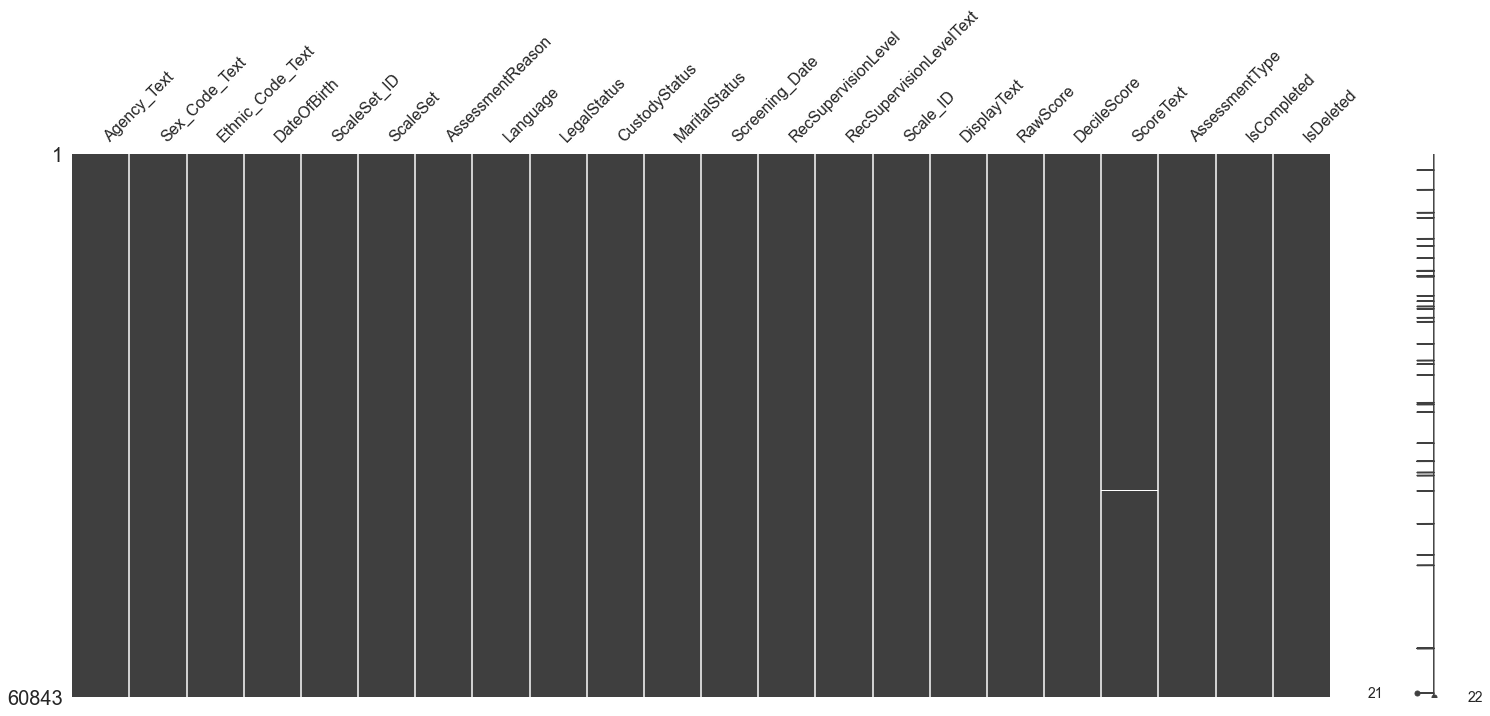

In [7]:
import missingno as msno 
msno.matrix(df) 

In [190]:
df.isna().sum()

Agency_Text                 0
Sex_Code_Text               0
Ethnic_Code_Text            0
DateOfBirth                 0
ScaleSet_ID                 0
ScaleSet                    0
AssessmentReason            0
Language                    0
LegalStatus                 0
CustodyStatus               0
MaritalStatus               0
Screening_Date              0
RecSupervisionLevel         0
RecSupervisionLevelText     0
Scale_ID                    0
DisplayText                 0
RawScore                    0
DecileScore                 0
ScoreText                  45
AssessmentType              0
IsCompleted                 0
IsDeleted                   0
dtype: int64

In [218]:
#del df['Screening_Date']


In [219]:
df['ScoreText'].unique()

array(['Low', 'High', 'Medium', nan], dtype=object)

In [81]:
#del df['ScoreText']

In [220]:
df

,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType
Person_ID,,,,,,,,,,,,,,,,,,,
50844,PRETRIAL,Male,Caucasian,12/05/92,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,7,Risk of Violence,-2.08,4,Low,New
50844,PRETRIAL,Male,Caucasian,12/05/92,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.06,2,Low,New
50844,PRETRIAL,Male,Caucasian,12/05/92,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New
50848,PRETRIAL,Male,Caucasian,09/16/84,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,7,Risk of Violence,-2.84,2,Low,New
50848,PRETRIAL,Male,Caucasian,09/16/84,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.50,1,Low,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65667,Probation,Male,African-American,06/21/64,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,3,Medium with Override Consideration,8,Risk of Recidivism,0.16,8,High,New
65667,Probation,Male,African-American,06/21/64,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,3,Medium with Override Consideration,18,Risk of Failure to Appear,35.00,10,High,New
68603,PRETRIAL,Male,Caucasian,02/06/85,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,1,Low,7,Risk of Violence,-2.75,2,Low,New


In [96]:
sex = df.loc[:,["Sex_Code_Text"]]
sex_group = sex.groupby(["Sex_Code_Text"]).size().reset_index()
sex_group.columns = ["Sex_Code_Text","counts"]
sex_group

,Sex_Code_Text,counts
0,Female,13329
1,Male,47514


In [97]:
ethnicity = df.loc[:,["Ethnic_Code_Text"]]
ethnicity_group = ethnicity.groupby(["Ethnic_Code_Text"]).size().reset_index()
ethnicity_group.columns = ["Ethnic_Code_Text","counts"]
ethnicity_group

,Ethnic_Code_Text,counts
0,African-American,27069
1,Arabic,75
2,Asian,324
3,Caucasian,21783
4,Hispanic,8742
5,Native American,219
6,Oriental,39
7,Other,2592


# K-NN Model

In [189]:
df_Ethnic = df.Ethnic_Code_Text.astype("category")
df_numericals = df.select_dtypes(np.number).fillna(0)

In [190]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
df_Ethnic.cat.codes

Person_ID
50844    3
50844    3
50844    3
50848    3
50848    3
        ..
65667    0
65667    0
68603    3
68603    3
68603    3
Length: 60843, dtype: int8

In [193]:
X_train, X_test, y_train, y_test = train_test_split(df_numericals, 
                                                    df_Ethnic.cat.codes,
                                                    test_size=0.20)
k_categories = len(y_train.unique())
k_categories
knn_classifier = KNeighborsClassifier(n_neighbors=5, 
                                        weights='uniform')

knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [194]:
from sklearn.metrics import f1_score
predictions = knn_classifier.predict(X_test)
f1_score(y_test, predictions, average="macro")

0.13520473279688222

In [197]:
for col in ['African-American', 'Asian', 'Hispanic', 'Native American', 'Other']:
    prediction = knn_classifier.predict(X_test[X_test[col] == 1])
    print("Accuracy (%s): "%col, (predictions == Y_test[X_test[col] == 1]).mean())

KeyError: 'African-American'

In [154]:
X = df_numericals
y = df_Ethnic.cat.codes
h = .02

In [ ]:


# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

#Z = Z.reshape(xx.shape)
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
plt.figure()
plt.pcolormesh(df_Ethnic.cat.codes, predictions, cmap=cmap_light)

In [29]:
df['Agency_Text'].unique()

array(['PRETRIAL', 'Probation', 'DRRD', 'Broward County'], dtype=object)

## Regression Model

In [156]:
df1 = pd.read_csv('compas-scores-raw.csv')

In [157]:
df1.Ethnic_Code_Text[df1.Ethnic_Code_Text == 'African-Am'] = 'African-American' 

In [158]:
df1.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [159]:
df1 = df1.drop(['Person_ID','AssessmentID','Case_ID','LastName','FirstName','MiddleName','IsCompleted','IsDeleted','Scale_ID','ScaleSet_ID','DateOfBirth','Screening_Date'],axis=1)


In [160]:
df1.head()

,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,RecSupervisionLevelText,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType
0,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1,Low,Risk of Violence,-2.08,4,Low,New
1,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1,Low,Risk of Recidivism,-1.06,2,Low,New
2,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1,Low,Risk of Failure to Appear,15.00,1,Low,New
3,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1,Low,Risk of Violence,-2.84,2,Low,New
4,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1,Low,Risk of Recidivism,-1.50,1,Low,New


In [136]:
df1['Sex_Code_Text'] = np.where(df1['Sex_Code_Text'] == 'Male', 1, 0)

In [137]:
df1['Language'] = np.where(df1['Language'] == 'English', 1, 0)

In [138]:
df1['ScaleSet']= np.where(df1['ScaleSet'] == 'All Scales',1,0)

In [139]:
df1['AssessmentReason'] = np.where(df1['AssessmentReason'] == 'Intake',1,0)

In [161]:
Y = df1['Ethnic_Code_Text']
X = df1.drop(['Ethnic_Code_Text'],axis=1)


In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 1)

In [163]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()


In [164]:
X_train['AssessmentReason'] = number.fit_transform(X_train['AssessmentReason'].astype('str'))
X_test['AssessmentReason'] = number.fit_transform(X_test['AssessmentReason'].astype('str'))

In [165]:
X_train['ScaleSet'] = number.fit_transform(X_train['ScaleSet'].astype('str'))
X_test['ScaleSet'] = number.fit_transform(X_test['ScaleSet'].astype('str'))

In [166]:
X_train['Language'] = number.fit_transform(X_train['Language'].astype('str'))
X_test['Language'] = number.fit_transform(X_test['Language'].astype('str'))

In [167]:
X_train['Sex_Code_Text'] = number.fit_transform(X_train['Sex_Code_Text'].astype('str'))
X_test['Sex_Code_Text'] = number.fit_transform(X_test['Sex_Code_Text'].astype('str'))

In [168]:
X_train['Agency_Text'] = number.fit_transform(X_train['Agency_Text'].astype('str'))
X_test['Agency_Text'] = number.fit_transform(X_test['Agency_Text'].astype('str'))

In [169]:
X_train['LegalStatus'] = number.fit_transform(X_train['LegalStatus'].astype('str'))
X_test['LegalStatus'] = number.fit_transform(X_test['LegalStatus'].astype('str'))


In [170]:
X_train['CustodyStatus'] = number.fit_transform(X_train['CustodyStatus'].astype('str'))
X_test['CustodyStatus'] = number.fit_transform(X_test['CustodyStatus'].astype('str'))

In [171]:
X_train['MaritalStatus'] = number.fit_transform(X_train['MaritalStatus'].astype('str'))
X_test['MaritalStatus'] = number.fit_transform(X_test['MaritalStatus'].astype('str'))


In [172]:
X_train['RecSupervisionLevelText'] = number.fit_transform(X_train['RecSupervisionLevelText'].astype('str'))
X_test['RecSupervisionLevelText'] = number.fit_transform(X_test['RecSupervisionLevelText'].astype('str'))


In [173]:
X_train['DisplayText'] = number.fit_transform(X_train['DisplayText'].astype('str'))
X_test['DisplayText'] = number.fit_transform(X_test['DisplayText'].astype('str'))


In [174]:
X_train['ScoreText'] = number.fit_transform(X_train['ScoreText'].astype('str'))
X_test['ScoreText'] = number.fit_transform(X_test['ScoreText'].astype('str'))

In [175]:
X_train['AssessmentType'] = number.fit_transform(X_train['AssessmentType'].astype('str'))
X_test['AssessmentType'] = number.fit_transform(X_test['AssessmentType'].astype('str'))

In [176]:
df1

,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,RecSupervisionLevelText,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType
0,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1,Low,Risk of Violence,-2.08,4,Low,New
1,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1,Low,Risk of Recidivism,-1.06,2,Low,New
2,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1,Low,Risk of Failure to Appear,15.00,1,Low,New
3,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1,Low,Risk of Violence,-2.84,2,Low,New
4,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1,Low,Risk of Recidivism,-1.50,1,Low,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,Probation,Male,African-American,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,3,Medium with Override Consideration,Risk of Recidivism,0.16,8,High,New
60839,Probation,Male,African-American,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,3,Medium with Override Consideration,Risk of Failure to Appear,35.00,10,High,New
60840,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1,Low,Risk of Violence,-2.75,2,Low,New
60841,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1,Low,Risk of Recidivism,-0.34,5,Medium,New


In [177]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [178]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)
Y_pred




array(['African-American', 'African-American', 'Caucasian', ...,
       'African-American', 'African-American', 'African-American'],
      dtype=object)

In [179]:
print("Accuracy: ", (Y_pred == Y_test).mean())

Accuracy:  0.5089160982825212


In [182]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[3901,    0,    0, 1372,   79,    0,    0,    0],
       [   6,    0,    0,    5,    0,    0,    0,    0],
       [  20,    0,    0,   41,    2,    0,    0,    0],
       [2180,    0,    0, 2033,  147,    0,    0,    0],
       [ 648,    0,    0,  883,  259,    0,    0,    0],
       [  29,    0,    0,   12,    1,    0,    0,    0],
       [   3,    0,    0,   10,    0,    0,    0,    0],
       [ 283,    0,    0,  243,   12,    0,    0,    0]])

### Linear Regression Model

In [184]:
Y_train = number.fit_transform(Y_train.astype('str'))
Y_test = number.fit_transform(Y_test.astype('str'))

In [185]:
from sklearn.linear_model import LinearRegression
#Diff b/w regression and classification
#Regression - predicting continuous real value, e.g salary
#Classification - Predicting category or know a class
#regressor - new var. that becomes object of the linear regression

regressor = LinearRegression() #this creates the simple linear regression model
regressor.fit(X_train,Y_train)

LinearRegression()

In [186]:
Y_LRpred = classifier.predict(X_test)
Y_LRpred

array(['African-American', 'African-American', 'Caucasian', ...,
       'African-American', 'African-American', 'African-American'],
      dtype=object)

In [188]:
print("Accuracy: ", (Y_LRpred == Y_test).mean()) #How??

Accuracy:  0.0


In [205]:
from sklearn import metrics
print(metrics.mean_absolute_error(Y_train, Y_LRpred))
print(metrics.mean_squared_error(Y_train, Y_LRpred))
print(np.sqrt(metrics.mean_squared_error(Y_train, Y_LRpred)))

ValueError: Found input variables with inconsistent numbers of samples: [48674, 12169]

## Graph Plots

In [72]:
sns.countplot?

In [207]:
df1.columns

Index(['Agency_Text', 'Sex_Code_Text', 'Ethnic_Code_Text', 'ScaleSet',
       'AssessmentReason', 'Language', 'LegalStatus', 'CustodyStatus',
       'MaritalStatus', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType'],
      dtype='object')

In [ ]:
#sns.set(rc={'figure.figsize':(20,20)}) 
#sns.pairplot(X_train, x_vars=['Agency_Text', 'Sex_Code_Text', 'ScaleSet',
 #      'AssessmentReason', 'Language', 'LegalStatus', 'CustodyStatus',
  #     'MaritalStatus', 'RecSupervisionLevel', 'RecSupervisionLevelText',
   #    'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
    #   'AssessmentType'], y_vars=X_test, size=10, aspect=0.7)

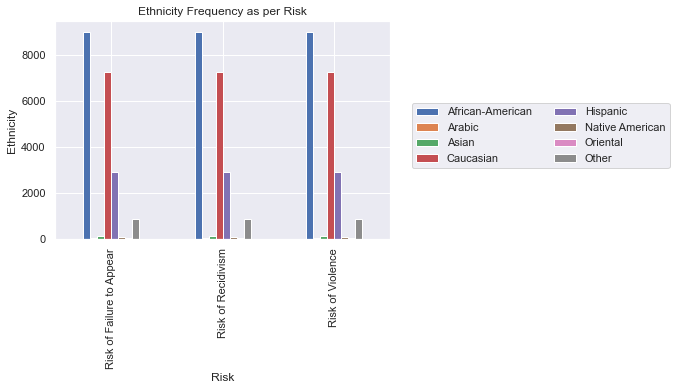

In [109]:
%matplotlib inline
pd.crosstab(df.DisplayText,df.Ethnic_Code_Text).plot(kind='bar')
plt.title('Ethnicity Frequency as per Risk')
plt.xlabel('Risk')
plt.ylabel('Ethnicity')
plt.legend(loc="upper center", bbox_to_anchor=(1.45, 0.65), ncol=2)
#plt.savefig('purchase_fre_job')

In [110]:
pd.crosstab(df.Ethnic_Code_Text, df.Sex_Code_Text)

Sex_Code_Text,Female,Male
Ethnic_Code_Text,,
African-American,5583,21486
Arabic,3,72
Asian,57,267
Caucasian,5433,16350
Hispanic,1731,7011
Native American,60,159
Oriental,9,30
Other,453,2139


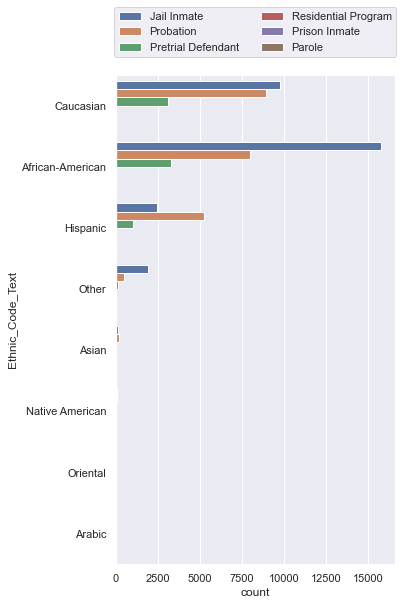

In [87]:
sns.countplot(y = df['Ethnic_Code_Text'],hue=df['CustodyStatus']) 
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)

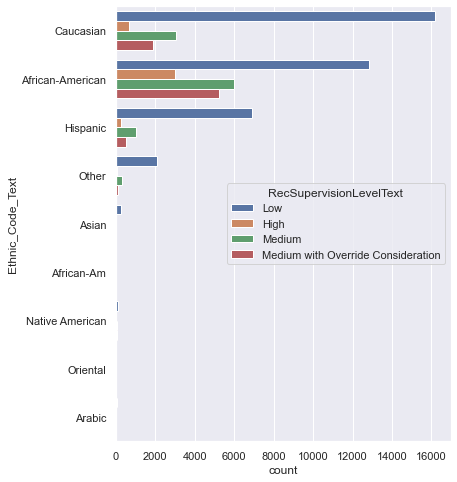

In [71]:
sns.set(rc={'figure.figsize':(6,8)}) 
sns.countplot(y = df['Ethnic_Code_Text'],hue=df['RecSupervisionLevelText'])

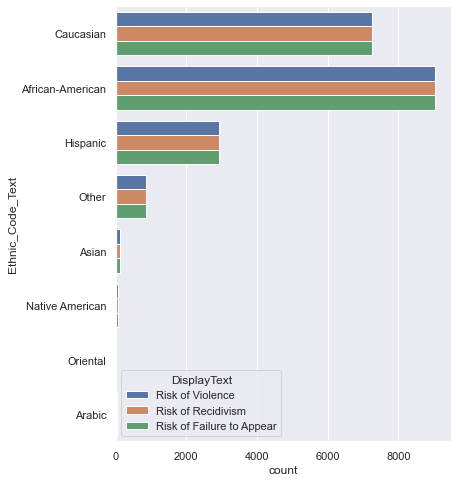

In [90]:
sns.set(rc={'figure.figsize':(6,8)}) 
sns.countplot(y = df['Ethnic_Code_Text'],hue=df['DisplayText'])

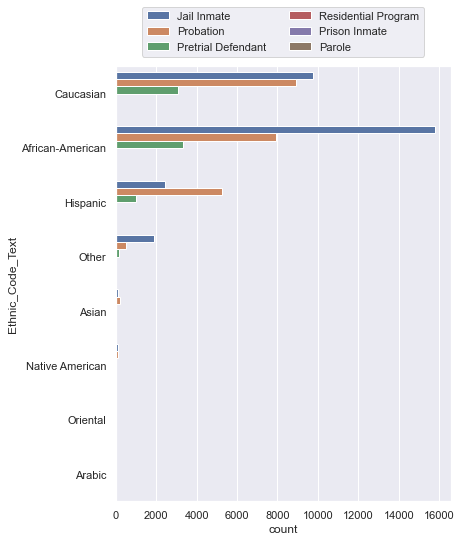

In [91]:
sns.set(rc={'figure.figsize':(6,8)}) 
sns.countplot(hue = df['CustodyStatus'],y=df['Ethnic_Code_Text'])
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2) #It seems more Caucasians are treated with probation than african-americans, who mainly become Jail Inmates

In [174]:
categorical_columns = df.select_dtypes(
    ['object', 'category']).columns.tolist()
categorical_columns

['Agency_Text',
 'Sex_Code_Text',
 'Ethnic_Code_Text',
 'DateOfBirth',
 'ScaleSet',
 'AssessmentReason',
 'Language',
 'LegalStatus',
 'CustodyStatus',
 'MaritalStatus',
 'RecSupervisionLevelText',
 'DisplayText',
 'ScoreText',
 'AssessmentType']

In [175]:
def categorical_variable_count(col):
    sns.countplot(y = df[col])

In [176]:
interact(categorical_variable_count, col=categorical_columns)

interactive(children=(Dropdown(description='col', options=('Agency_Text', 'Sex_Code_Text', 'Ethnic_Code_Text',…

<function __main__.categorical_variable_count(col)>

In [89]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers= [ ('encoder', OneHotEncoder(), [0])] , remainder= 'passthrough')
X = np.array(ct.fit_transform(X))

In [97]:
X[:,-1]

array(['New', 'New', 'New', ..., 'New', 'New', 'New'], dtype=object)

In [99]:
from sklearn.impute import SimpleImputer
X1 = df.drop('Ethnic_Code_Text',axis=1)
X = X1.iloc[:,:].values
Y = df.loc[:,'Ethnic_Code_Text'].values
imputer = SimpleImputer(missing_values= np.nan, strategy = 'most_frequent')
imputer.fit(X[:,-2,-3,-5,-7])
X[:,-2,-3,-5,-7] = imputer.transform(X[:,-2,-3,-5,-7])

IndexError: too many indices for array

array(['Low', 'Low', 'Low', ..., 'Low', 'Medium', 'Low'], dtype=object)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers= [ ('encoder', OneHotEncoder(), [0])] , remainder= 'passthrough')
X = np.array(ct.fit_transform(X))
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#Y = le.fit_transform(Y)

In [73]:
score_col = df.iloc[:,-2].values
score_col

array(['Low', 'Low', 'Low', ..., 'Low', 'Medium', 'Low'], dtype=object)

array([['PRETRIAL', 'Male', '12/05/92', 'Risk and Prescreen', 'Intake',
        'English', 'Pretrial', 'Jail Inmate', 'Single', 1, 'Low', 7,
        'Risk of Violence', -2.08, 4, 'Low', 'New']], dtype=object)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    df_Ethnic.cat.codes,
                                                    test_size=0.20)
k_categories = len(y_train.unique())
k_categories
knn_classifier = KNeighborsClassifier(n_neighbors=10, 
                                        weights="uniform")

knn_classifier.fit(X_train, y_train)

In [29]:
df.Ethnic_Code_Text[df.Ethnic_Code_Text == 'African-Am'] = 'African-American' 

In [30]:
df.Ethnic_Code_Text.unique()

array(['Caucasian', 'African-American', 'Hispanic', 'Other', 'Asian',
       'Native American', 'Oriental', 'Arabic'], dtype=object)

In [32]:
df_numericals

,RecSupervisionLevel,Scale_ID,RawScore,DecileScore
Person_ID,,,,
50844,1,7,-2.08,4
50844,1,8,-1.06,2
50844,1,18,15.00,1
50848,1,7,-2.84,2
50848,1,8,-1.50,1
...,...,...,...,...
65667,3,8,0.16,8
65667,3,18,35.00,10
68603,1,7,-2.75,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(, 
                                                    movies_genre.cat.codes, 
                                                    test_size=0.20)